In [1]:
from Data_loader import df_to_navigation_info
import pandas as pd

In [2]:
file_path = '/Users/lichen18/Documents/Project/Data_mining/data/data_for_analysis/HLX32B143R1309094.csv'
df = pd.read_csv(file_path)
navigation_info = df_to_navigation_info(df)

In [3]:
navigation_info

[{'vin': 'HLX32B143R1309094',
  'start_location': '119.575906,39.930463',
  'end_location': '119.538115,39.945146',
  'end_adcode': 130302,
  'end_typeCode': '120302',
  'end_address': '河北省秦皇岛市海港区雪山路与松花江东道交叉口',
  'poi': '公园里',
  'start_time': '2025-05-17 09:23:59.734000',
  'end_time': '2025-05-17 09:38:53.734000',
  'distance': 5426,
  'duration': 894},
 {'vin': 'HLX32B143R1309094',
  'start_location': '119.575804,39.932795',
  'end_location': '119.488542,39.813902',
  'end_adcode': 130304,
  'end_typeCode': '110101',
  'end_address': '北戴河中海滩路',
  'poi': '老虎石海上公园',
  'start_time': '2025-05-18 05:56:08.925000',
  'end_time': '2025-05-18 06:42:40.925000',
  'distance': 17089,
  'duration': 2792},
 {'vin': 'HLX32B143R1309094',
  'start_location': '119.489391,39.814228',
  'end_location': '119.577716,39.932922',
  'end_adcode': 130302,
  'end_typeCode': '120302',
  'end_address': '河北省-秦皇岛市-海港区-和平大街与西港路交汇口金龙花苑对面',
  'poi': '汤河铭筑',
  'start_time': '2025-05-18 07:10:45.600000',
  'end_time':

In [4]:
from Handle_csv.scenario.navigation.label import basic_feature_label
bfl = basic_feature_label(navigation_info)
bfl.show_basic_feature_label()

feature        基础信息               时间规律                 空间范围         目的地偏好  \
label           居住地         工作地 出行周期偏好 出行时段偏好 高峰出行模式 单次出行距离  活动区域 高频目的地类型   
0        悦都新苑二区(东门)  无法确认用户工作地点    均衡型    均衡型  错峰出行者  长途主导型  跨城活动     NaN   

feature    通勤基础               通勤空间        工作习惯  
label     规律性行程 规律行程距离 规律行程耗时 通勤方向        工作时长  
0        无规律性行程      无      无  待实现  无法确认用户工作地点

In [ ]:
def sub_classify_5(poi_info_list) -> str:
        # ("目的地偏好","高频目的地类型")
        # 统计每个地点类型出现的次数 poi_info_dict的格式为 [{poi: "xxx", end_typeCode: "xxx", start_time: "xxx", end_time: "xxx"}]
        activity_types = {}
        for poi_item in poi_info_list:
            # if poi_item['poi'] != self.home_name and poi_item['poi'] != self.workplace:
                if poi_item['end_typeCode'] in activity_types:
                    activity_types[poi_item['end_typeCode']] += 1
                else:
                    activity_types[poi_item['end_typeCode']] = 1
        if activity_types == {}:
            return "无出行记录"
        # 把activity_types这个字典按value大小排序，输出[(key, value), (key, value), ...]
        high_frequency_activity_types = sorted(activity_types.items(), key=lambda x: x[1], reverse=True)
        #返回最高频地点类型
        return high_frequency_activity_types[0][0]

sub_classify_5(navigation_info)

'991400'

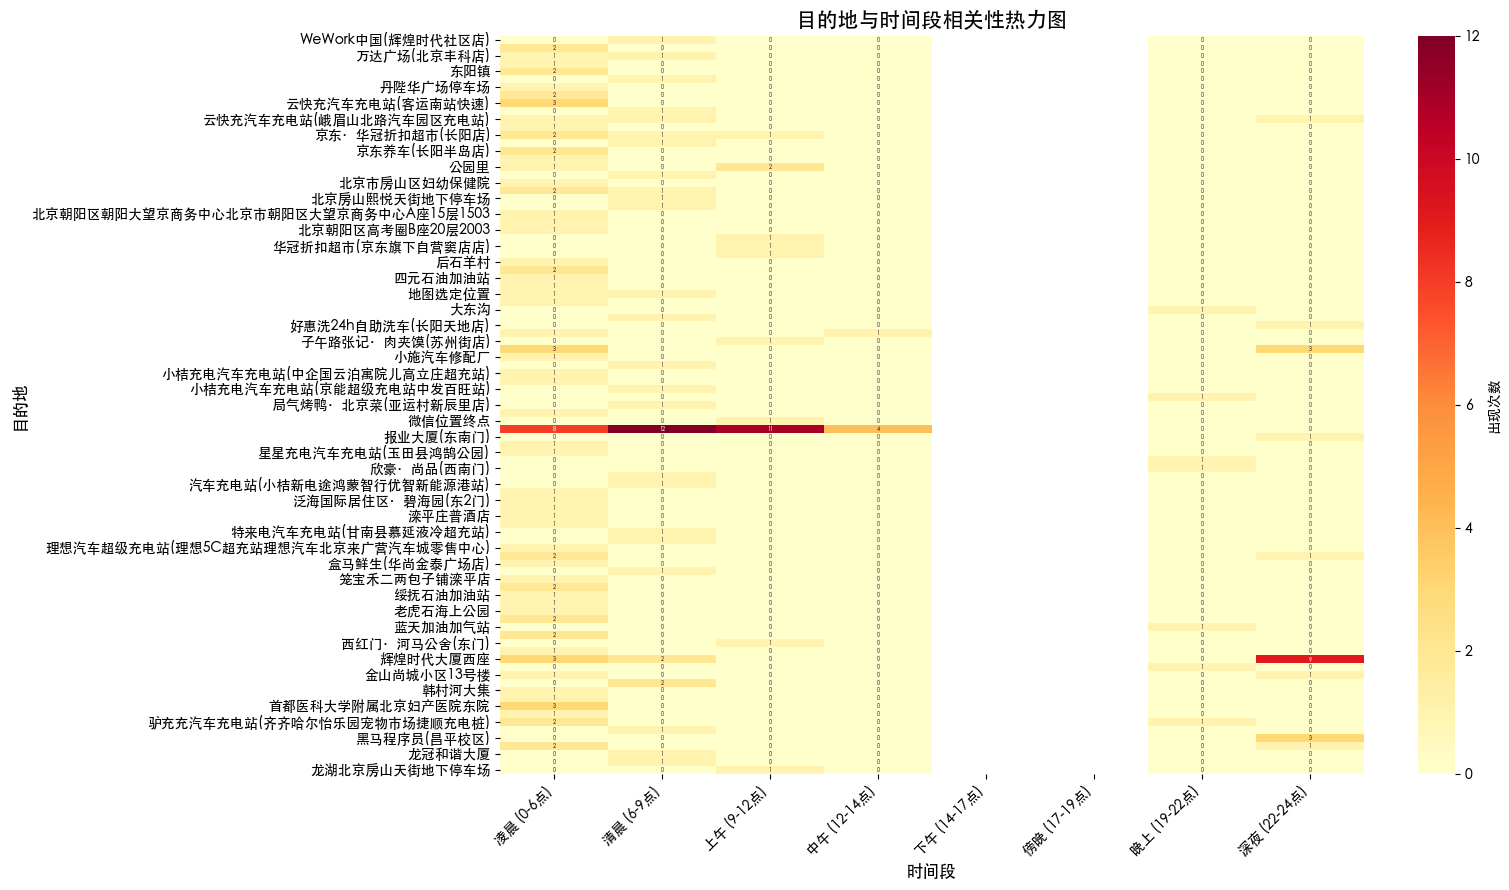

In [5]:
from Handle_csv.scenario.navigation.visualization import *
plot_destination_time_heatmap(navigation_info)

/var/folders/65/9766g68j0n13ny5_s_qz7_1m0000gp/T/ipykernel_4523/1521476980.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


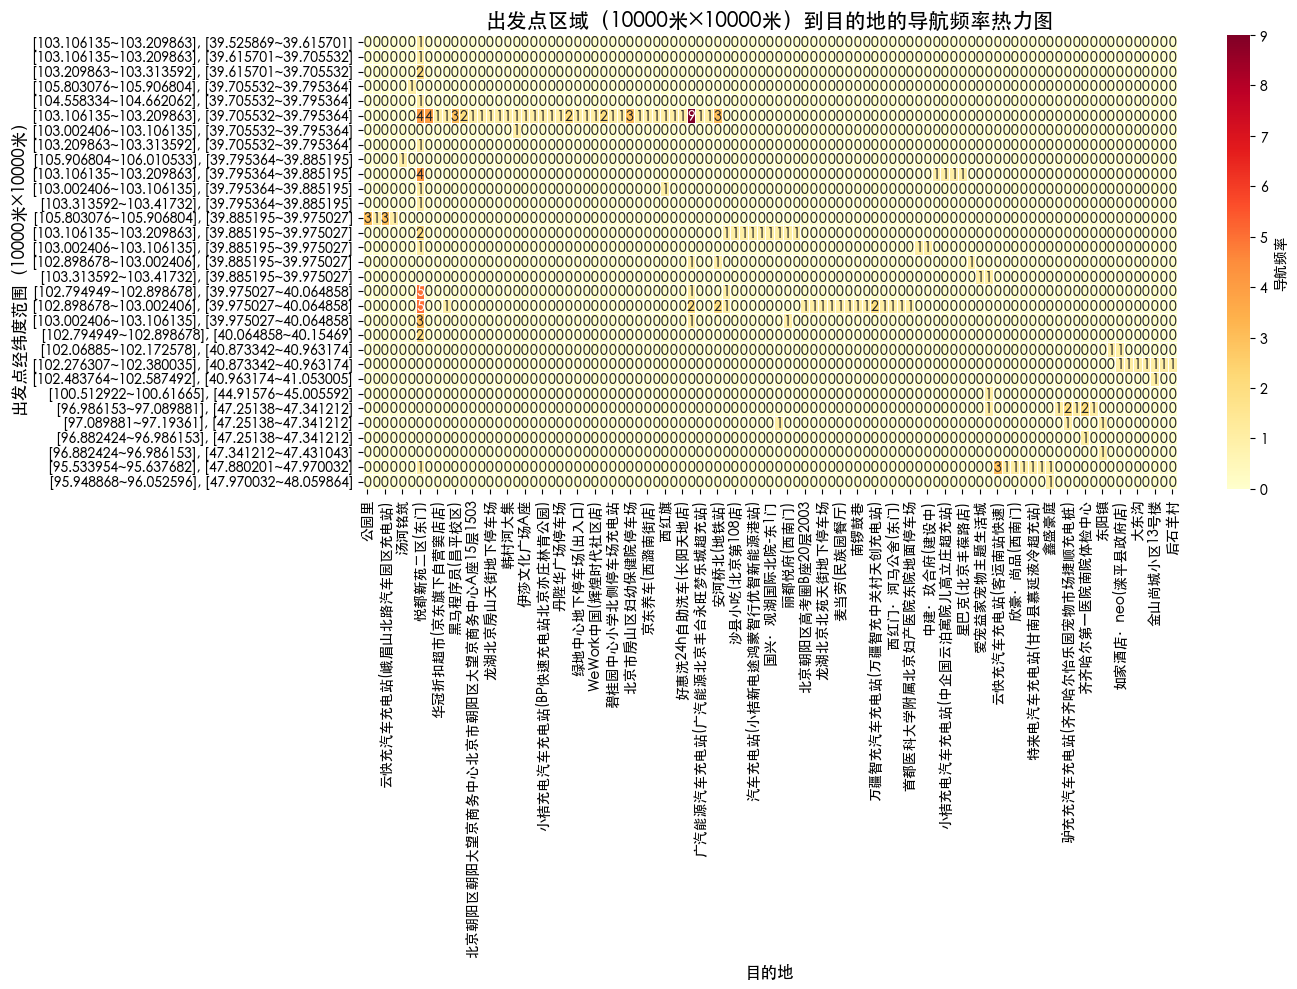

In [6]:
from Handle_csv.scenario.navigation.origin_destination_heatmap import *
fig = plot_origin_destination_heatmap(navigation_info,grid_size=10000)
fig.show()

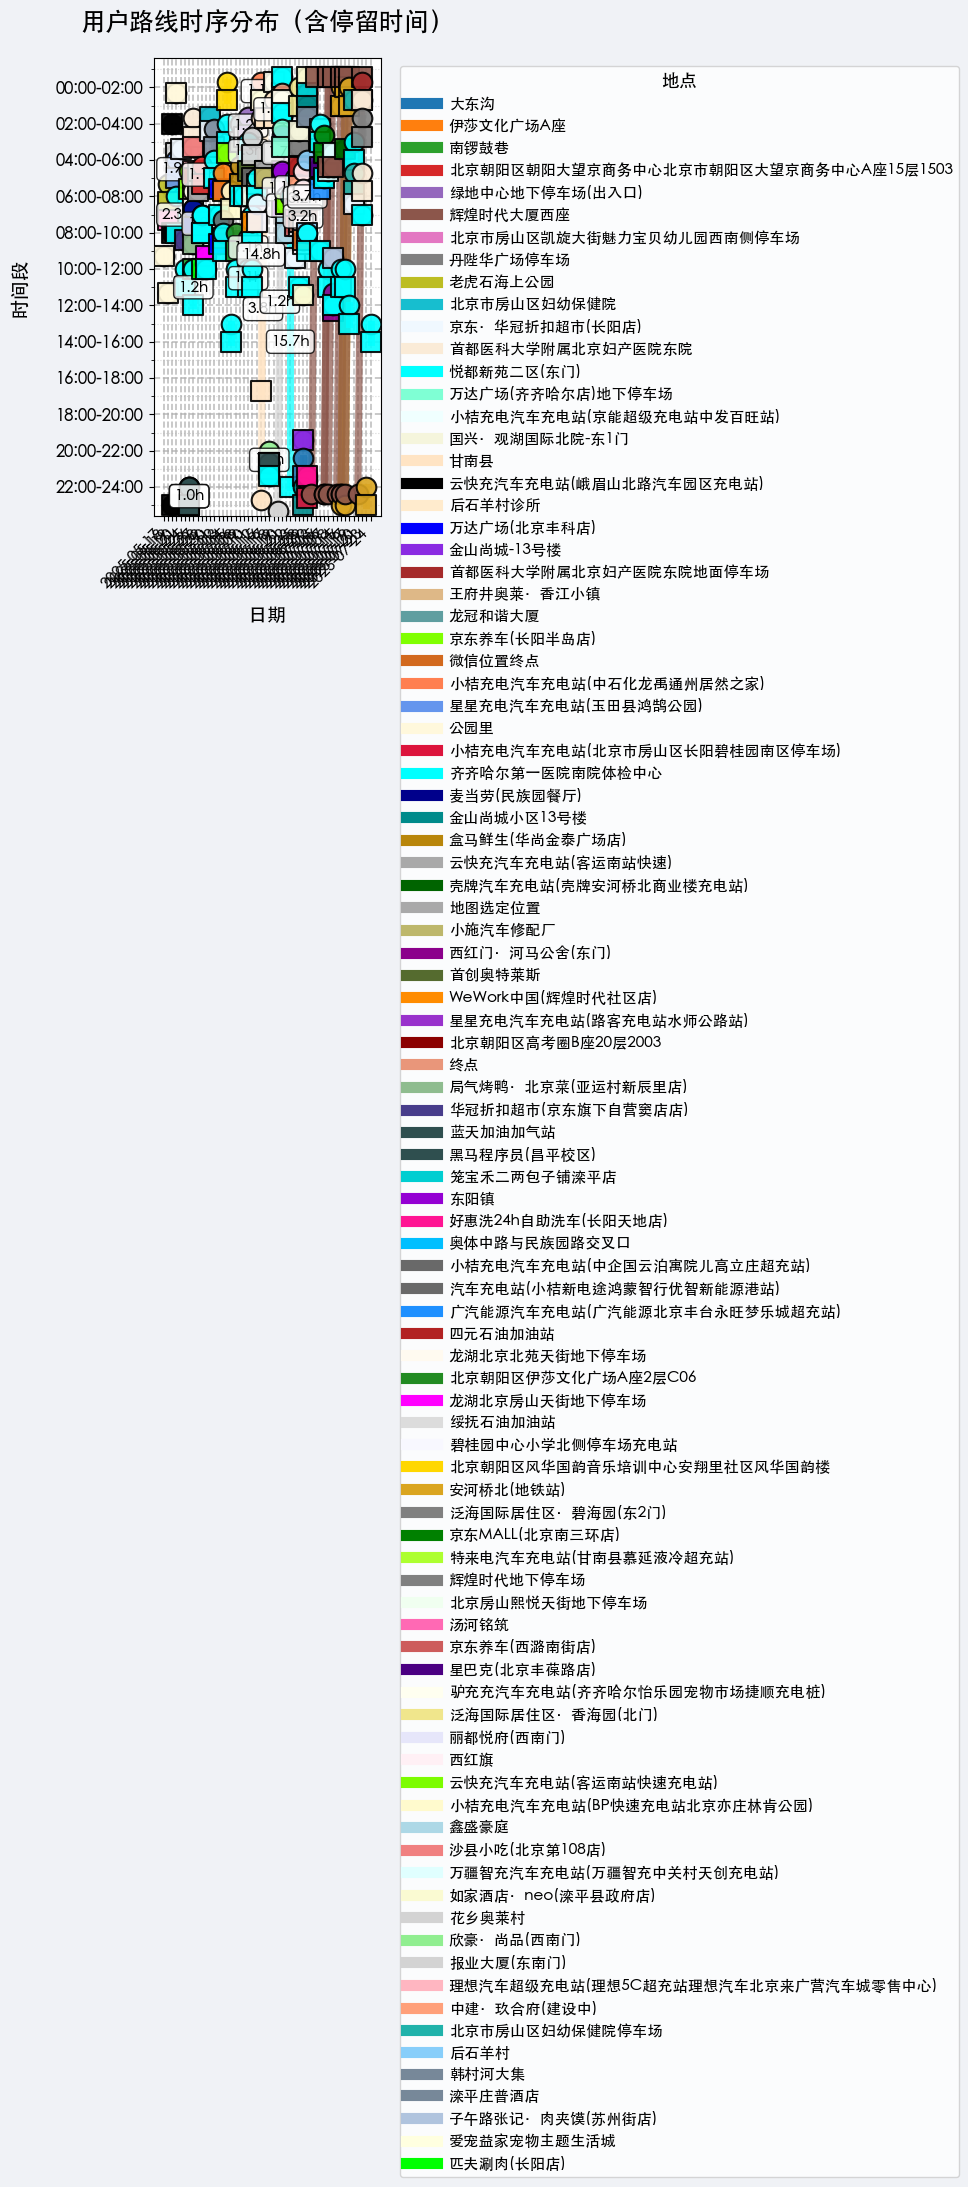

In [7]:
from Handle_csv.scenario.navigation.navigation_poi_time import *
buf = plot_route_timeline(navigation_info)